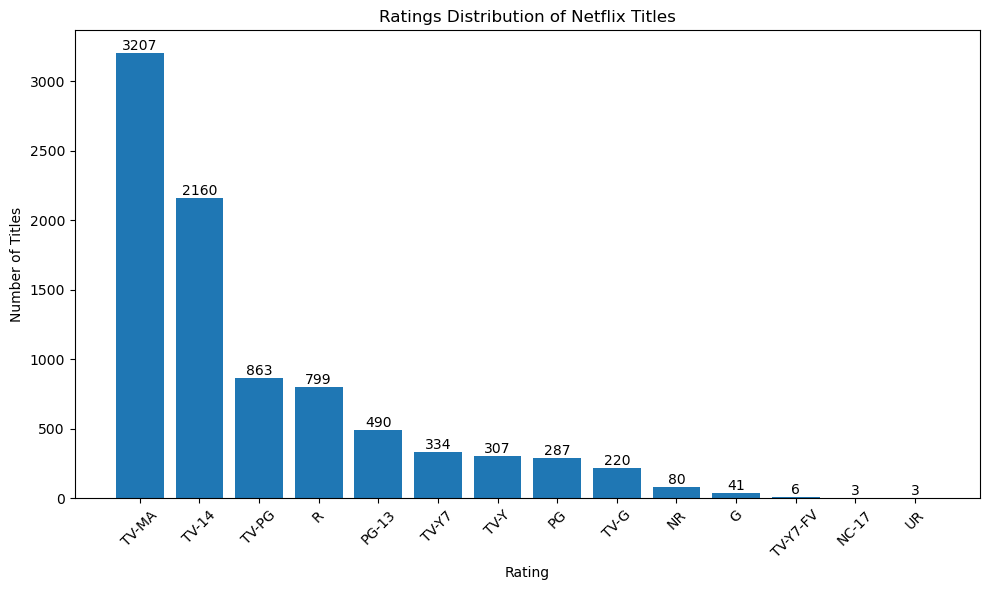

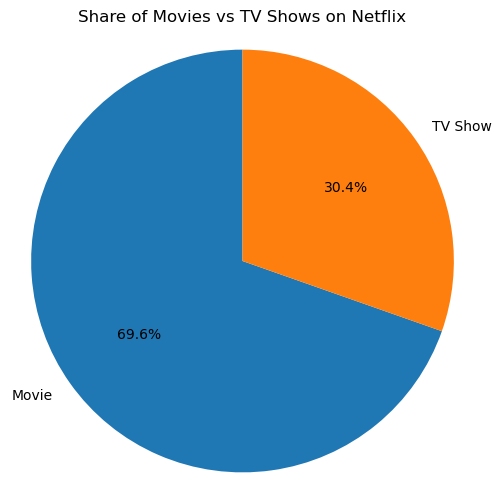

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# ================================
# LOAD DATA
# ================================
# Read the Netflix dataset into a pandas DataFrame
df = pd.read_csv("netflix_titles.csv")

# ================================
# DATA CLEANING
# ================================

# Remove rows where rating is missing
df = df.dropna(subset=['rating'])

# Remove duplicate rows
df = df.drop_duplicates()

# Some rows have duration like "74 min" incorrectly placed in rating column
# Remove those rows
df = df[~df['rating'].str.contains('min', na=False)]

# ================================
# BAR CHART: DISTRIBUTION OF RATINGS
# ================================

# Count how many titles fall under each rating category
rating_counts = df['rating'].value_counts()

# Create bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(rating_counts.index, rating_counts.values)

# Chart formatting
plt.title("Ratings Distribution of Netflix Titles")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)

# Add count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        int(height),
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

# ================================
# PIE CHART: MOVIES VS TV SHOWS
# ================================

# Count number of Movies vs TV Shows
type_counts = df['type'].value_counts()

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(
    type_counts,
    labels=type_counts.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Share of Movies vs TV Shows on Netflix")
plt.axis('equal')  # keeps pie circular

plt.show()